In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('heart.csv')

In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
df.shape

(303, 14)

In [6]:
df = df.drop(columns=['thal'])

In [7]:
df.shape

(303, 13)

In [8]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,1


## Data Exploration

In [9]:
df['target'].value_counts()

target
1    165
0    138
Name: count, dtype: int64

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

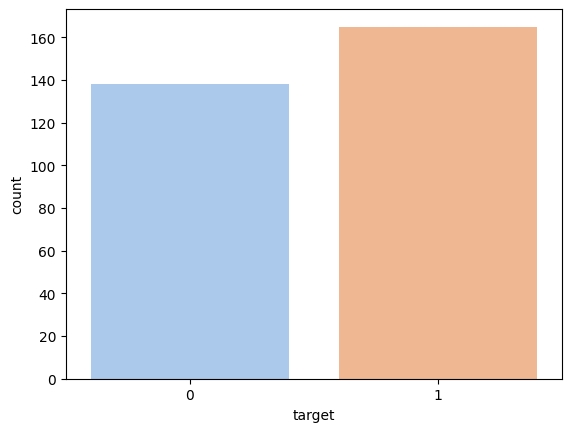

In [18]:
sns.countplot(x='target', data=df, hue='target', palette='pastel', legend=False)
plt.show()


## Split the data into features (x) and target (y) 

In [21]:
X = pd.DataFrame(df.iloc[:,:-1])
y = pd.DataFrame(df.iloc[:,-1])

In [22]:
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca
0,63,1,3,145,233,1,0,150,0,2.3,0,0
1,37,1,2,130,250,0,1,187,0,3.5,0,0
2,41,0,1,130,204,0,0,172,0,1.4,2,0
3,56,1,1,120,236,0,1,178,0,0.8,2,0
4,57,0,0,120,354,0,1,163,1,0.6,2,0


In [23]:
y.shape

(303, 1)

In [19]:
from sklearn.model_selection import train_test_split

In [24]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=1)

## Create and Train the model

In [26]:
from sklearn.linear_model import LogisticRegression
lg = LogisticRegression()

In [29]:
lg.fit(X_train,y_train)

C:\Users\s\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\s\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [30]:
y_pred = lg.predict(X_test)

In [31]:
lg.score(X_test,y_test)

0.7377049180327869

## Evaluate model using Confusion Matrix

In [32]:
from sklearn.metrics import confusion_matrix
Confusion_Matrix = confusion_matrix(y_test,y_pred)
print(Confusion_Matrix)

[[20 10]
 [ 6 25]]


In [33]:
score = (20+25)/(20+25+10+6)
score

0.7377049180327869

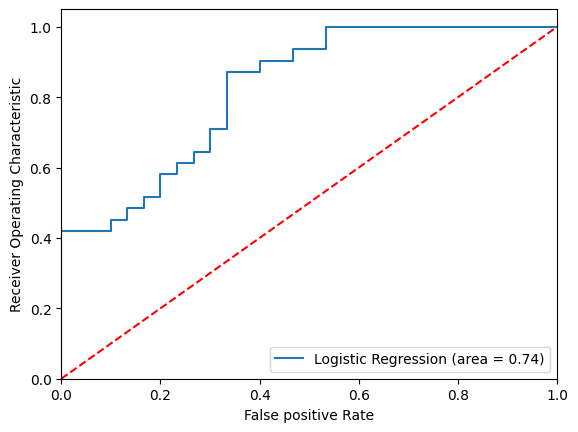

In [34]:
from sklearn.metrics import roc_auc_score,roc_curve
Roc_auc_score = roc_auc_score(y_test,lg.predict(X_test))
fpr,tpr,thresholds = roc_curve(y_test,lg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr,tpr,label="Logistic Regression (area = %0.2f)" %Roc_auc_score)
plt.plot([0,1],[0,1],'r--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel("False positive Rate")
plt.ylabel("Receiver Operating Characteristic")
plt.legend(loc='lower right')
plt.savefig('Log_Roc')
plt.show()